In [25]:
import json, os
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
TEST_ITERATIONS = ["2/50", "2/75", "2/100", "2/125", "2/150", "2/175", "2/200", "2/400", "2/1000"]

In [88]:
results = []
for TEST_ITERATION in TEST_ITERATIONS:
	folder = f"../results/{TEST_ITERATION}"

	file_names = os.listdir(folder)

	for file_name in file_names:
		if file_name.startswith("_") or not file_name.endswith(".json"):
			continue
		with open(os.path.join(folder, file_name), "r") as file:
			data = json.load(file)
			data["path"] = folder
			results.append(data)

In [89]:
results[0]

{'fileName': 'vc_25_150_06.txt',
 'graph': {'n': 25, 'm': 150, 'd': 0.5},
 'problemClass': 'SPI',
 'testInstanceName': '150',
 'testInstanceVersion': '06.txt',
 'performanceMetrics': {'generations': [{'best': 496.0,
    'objective': 496,
    'avg': 732.9,
    'evals': 75},
   {'best': 414.0, 'objective': 414, 'avg': 606.04, 'evals': 113},
   {'best': 343.0, 'objective': 343, 'avg': 534.76, 'evals': 152},
   {'best': 270.0, 'objective': 270, 'avg': 480.58, 'evals': 174},
   {'best': 270.0, 'objective': 270, 'avg': 445.76, 'evals': 208},
   {'best': 270.0, 'objective': 270, 'avg': 407.62, 'evals': 244},
   {'best': 334.0, 'objective': 334, 'avg': 392.6, 'evals': 271},
   {'best': 295.0, 'objective': 295, 'avg': 381.88, 'evals': 304},
   {'best': 295.0, 'objective': 295, 'avg': 367.4, 'evals': 331},
   {'best': 297.0, 'objective': 297, 'avg': 380.4, 'evals': 366},
   {'best': 297.0, 'objective': 297, 'avg': 386.14, 'evals': 398},
   {'best': 287.0, 'objective': 287, 'avg': 345.12, 'evals'

In [90]:
rows = []

for entry in results:
    path = entry.get('path')
    fileName = entry.get('fileName')
    graph = entry.get('graph', {})
    problemClass = entry.get('problemClass')
    testInstanceName = entry.get('testInstanceName')
    testInstanceVersion = entry.get('testInstanceVersion')
    
    # Overall objective at the run level (if applicable)
    overall_objective = entry.get('performanceMetrics', {}).get('objective')
    
    # Get the list of generations
    generations = entry.get('performanceMetrics', {}).get('generations', [])
    
    # Create a row per generation with additional metadata.
    for gen_index, gen in enumerate(generations):
        row = {
            'path': path,
            'fileName': fileName,
            'graph_n': graph.get('n'),
            'graph_m': graph.get('m'),
            'graph_d': graph.get('d'),
            'problemClass': problemClass,
            'testInstanceName': int(testInstanceName),
            'testInstanceVersion': testInstanceVersion,
            'overall_objective': overall_objective,
            'generation': gen_index,
            'gen_best': gen.get('best'),
            'gen_objective': gen.get('objective'),
            'gen_avg': gen.get('avg'),
            'gen_evals': gen.get('evals'),
        }
        rows.append(row)

# Create the DataFrame.
df = pd.DataFrame(rows)

In [91]:
df_filtered = df.loc[df['gen_evals'] < 20_000]

df_filtered.loc[:, 'populationSize'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['populationSize', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['populationSize','problemClass', 'testInstanceName']).reset_index().set_index(['populationSize', 'problemClass', 'testInstanceName']).unstack(level='populationSize')



/tmp/ipykernel_44501/4169853972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'populationSize'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))


gen_objective                             \
populationSize                         50       75       100      125    
problemClass testInstanceName                                            
LPI          10000                  12560.8  12126.3  12317.3  12398.7   
MPI          500                      848.4    913.2    903.5    888.2   
             750                     2777.4   2835.2   2773.6   2796.8   
             2000                     224.2    226.3    223.9    214.3   
             3000                    1028.4   1082.8   1027.2    975.2   
SPI          60                       188.4    174.8    178.3    173.8   
             120                       90.1     91.1     92.2     83.8   
             150                      120.6    120.6    113.7    118.2   

                                                                            
populationSize                    150      175      200      400      1000  
problemClass testInstanceName                                               
LPI          10000             11881.6  12703.6  12752.4  12364.1  15368.6  
MPI          500                 822.7    852.1    814.8    787.1    861.7  
             750                2731.7   2693.7   2845.4   2586.1   2945.4  
             2000                209.9    228.9    218.6    202.4    210.9  
             3000                988.7   1106.7   1064.6    937.6   1297.0  
SPI          60                  177.5    179.9    177.5    174.6    174.3  
             120                  84.3     83.2     86.2     83.9     83.7  
             150                 112.5    116.0    114.5    115.7    112.9

In [97]:
last_gen_df.groupby(['populationSize']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).T


populationSize,50,75,100,125,150,175,200,400,1000
gen_objective,2229.7875,2196.2875,2203.7125,2206.125,2126.1125,2245.5125,2259.25,2156.4375,2631.8125


In [103]:
df_filtered = df

df_filtered.loc[:, 'populationSize'] = df['path'].apply(lambda x: int(x.split('/')[-1]))

df_filtered = df_filtered.loc[df_filtered['populationSize'] == 150]


# Sort to ensure last generation is correctly identified
df_sorted = df_filtered.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# TODO: gen_best dovrebbe coincidere con gen_objective. dovrebbe ritornare NULL la obj

# Display or save result
result


,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,11865.3,20000.0
1,MPI,500,822.7,20000.0
2,MPI,750,2731.7,20000.0
3,MPI,2000,209.9,20000.0
4,MPI,3000,988.7,20000.0
5,SPI,60,177.5,20000.0
6,SPI,120,84.3,20000.0
7,SPI,150,112.5,20000.0


In [4]:
for generations in results:
	continue
	df = pd.DataFrame(generations["performanceMetrics"]["generations"])
	plt.figure(figsize=(10, 5))
	plt.plot(df.index, df["best"], label="Best Fitness", marker='o')
	plt.plot(df.index, df["avg"], label="Average Fitness", marker='s')
	plt.xlabel("Generations")
	plt.ylabel("Fitness")
	plt.title("GA Evolution: Best vs Average Fitness")
	plt.legend()
	plt.grid()
	plt.show()

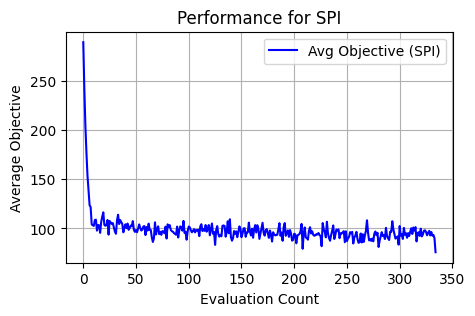

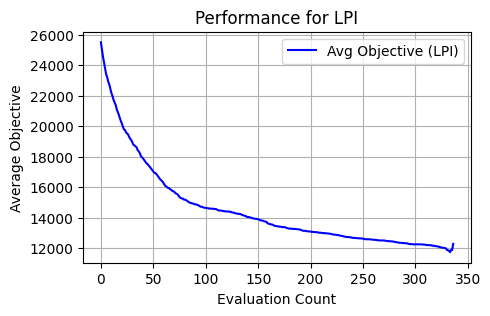

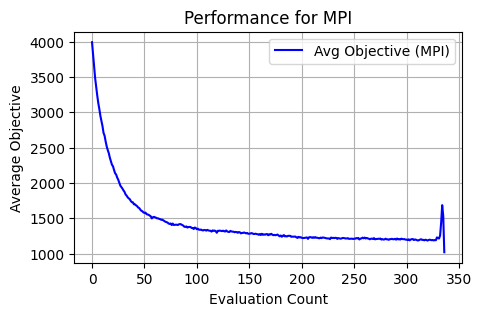

In [31]:
TEST_ITERATION = "2/150"

# Create the output directory for the plots.
output_dir = os.path.join("..", "results", str(TEST_ITERATION), "plots")
os.makedirs(output_dir, exist_ok=True)

problem_classes = df["problemClass"].unique()

# Plot for each problem class
for problem_class in problem_classes:
    plt.figure(figsize=(5, 3))

    # Filter data for the specific problem class
    df_subset = df[df["problemClass"] == problem_class]

    df_grouped = df_subset.groupby("generation", as_index=False)["gen_objective"].mean()

    # Plot evaluation counts vs. avg objective
    plt.plot(df_grouped["generation"], df_grouped["gen_objective"], marker='', linestyle='-', label=f'Avg Objective ({problem_class})', color='blue')


    # Titles and labels
    plt.title(f'Performance for {problem_class}')
    plt.xlabel('Evaluation Count')
    plt.ylabel('Average Objective')
    plt.legend()
    plt.grid(True)

    file_path = os.path.join(output_dir, f"objective_vs_evals_{problem_class}.jpg")
    plt.savefig(file_path, format='jpg', dpi=300)
    plt.show()

    # Show the plot
    plt.show()


_ = '''
for entry in results:
    problem_class = entry['problemClass']
    generations = entry['performanceMetrics']['generations']
    
    # Extract evaluation counts and objectives for each generation.
    evals = [gen['evals'] for gen in generations]
    objectives = [gen['objective'] for gen in generations]
    
    # Create an entry for the problem class if it does not exist.
    if problem_class not in problem_classes:
        # Store the evaluation counts once (assuming they are identical across instances)
        problem_classes[problem_class] = {'evals': evals, 'objectives': []}
    
    # Append the objectives list for this instance.
    problem_classes[problem_class]['objectives'].append(objectives)

# Create the output directory for the plots.
output_dir = os.path.join("..", "results", str(TEST_ITERATION), "plots")
os.makedirs(output_dir, exist_ok=True)

# Generate plots for each problem class.
for problem_class, data in problem_classes.items():
    evals = data['evals']
    objectives_lists = data['objectives']
    
    # If instances might have different lengths, pad them with NaNs.
    max_len = max(len(lst) for lst in objectives_lists)
    objectives_arrays = np.array([lst + [np.nan] * (max_len - len(lst)) for lst in objectives_lists])
    
    # Compute the average objective at each evaluation count.
    avg_objectives = np.nanmean(objectives_arrays, axis=0)
    
    plt.figure(figsize=(8, 5))
    # Plot using evaluation counts as the x-axis.
    plt.plot(evals, avg_objectives, marker='o', linestyle='-', label='Average Objective', color='blue')
    
    plt.title(f'Performance for {problem_class}')
    plt.xlabel('Evaluation Count')
    plt.ylabel('Objective (Best Value)')
    plt.legend()
    plt.grid(True)
    
    file_path = os.path.join(output_dir, f"objective_vs_evals_{problem_class}.jpg")
    plt.savefig(file_path, format='jpg', dpi=300)
    plt.show()
'''